In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
fname = '/Library/Fonts/IBM_Plex_Sans/static/IBMPlexSans-Regular.ttf'  # download IBM Plex Sans
font_manager.fontManager.addfont(fname)
prop = font_manager.FontProperties(fname=fname)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

plt.rcParams.update({
    'font.size': 24,
    'axes.titlesize': 28,
    'axes.labelsize': 28,
    'xtick.labelsize': 24,
    'ytick.labelsize': 24,
    'legend.fontsize': 28,
    'figure.titlesize': 28
})

In [4]:
categories = ["Sen1Floods11", "Burn Scars", "reBEN 7k", "Cashew\nPlantation", "SACrop\nType"]

prithvi = {
    "Linear Probing": [88.08, 83.90, 31.25, 27.29, 27.26],
    "LoRA": [90.04, 93.33, 38.84, 77.53, 40.35],
    "VPT": [89.31, 92.16, 38.40, 62.00, 39.33],
    "ViT Adapter": [88.52, 91.95, 35.14, 75.92, 37.24],
    "Full Fine-tuning": [90.13, 92.85, 37.42, 80.58, 39.74],
}

clay = {  
    "Linear Probing": [89.6, 83.2, 32.6, 27.5, 31.1],
    "LoRA": [90.4, 92.7, 38.7, 62.3, 39.6],
    "VPT": [89.7, 90.7, 36.9, 28.4, 36.9],
    "ViT Adapter": [90, 90, 37, 50, 40],  # Prithvi values, ignore
    "Full Fine-tuning": [90.4, 91.6, 38.7, 72.0, 40.2],
}
model_values = list(prithvi.values()) + list((clay.values()))

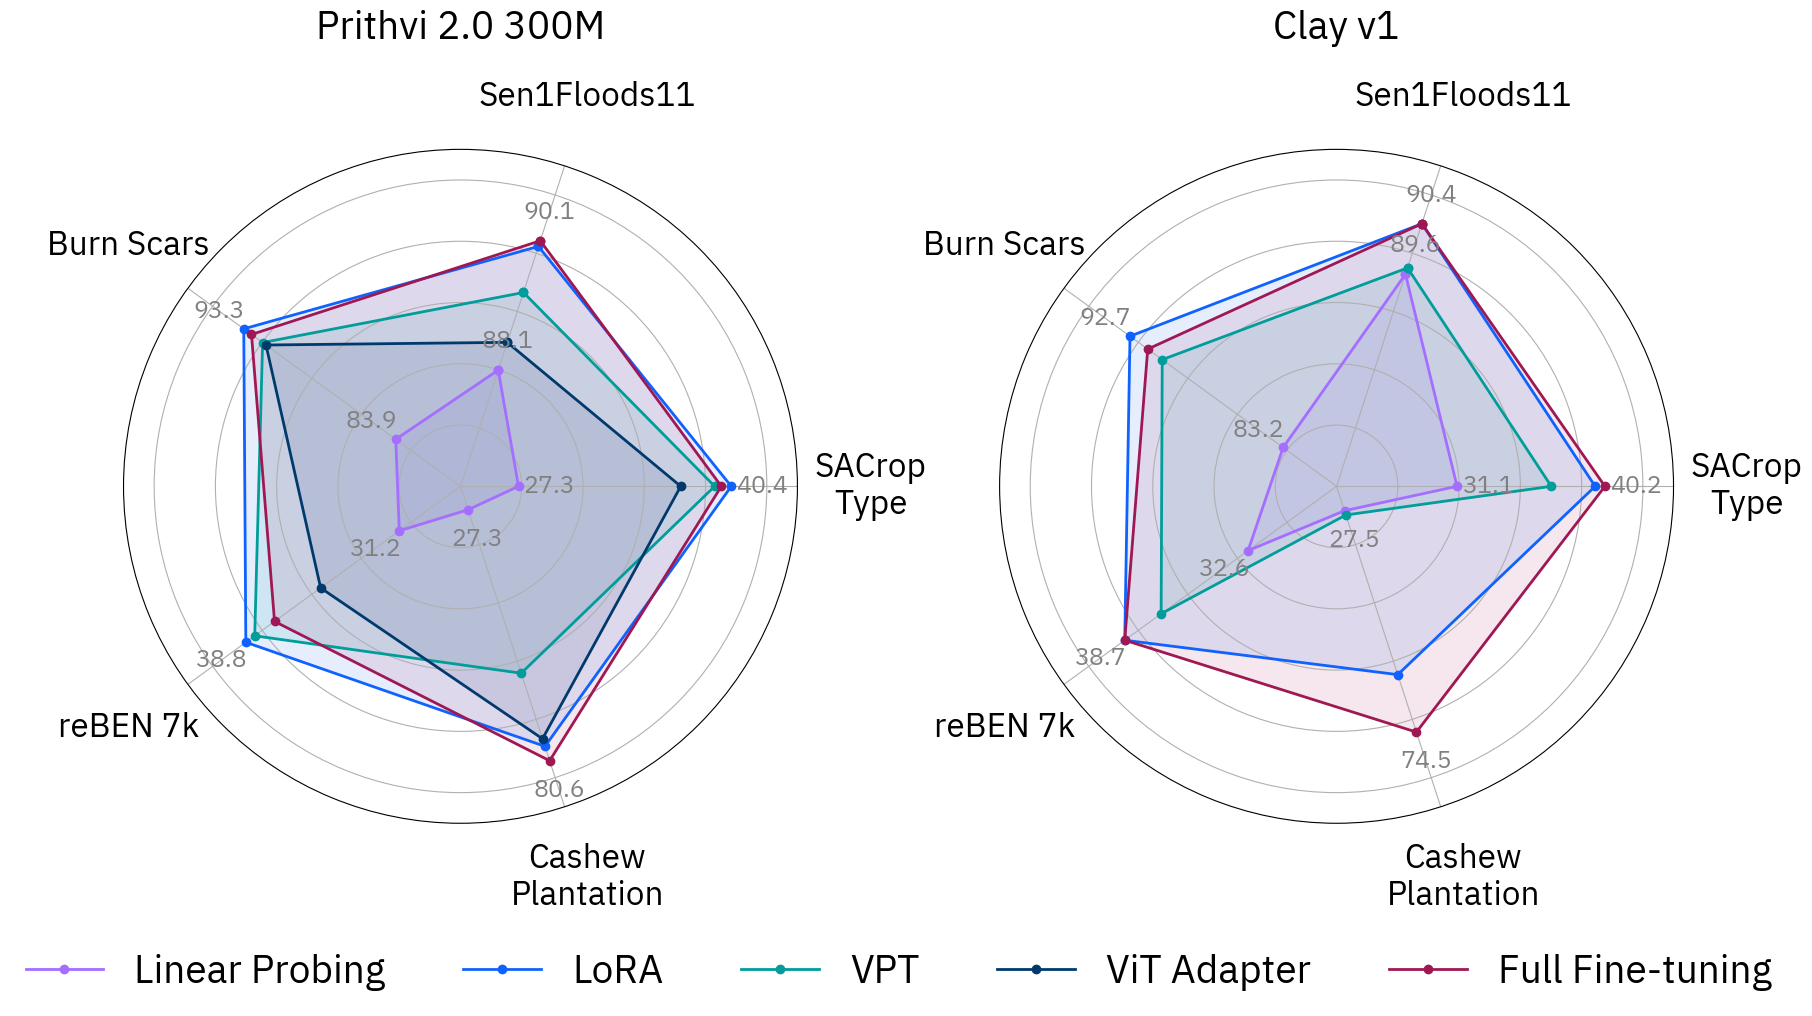

In [5]:
min_vals = np.min(model_values, axis=0)
max_vals = np.max(model_values, axis=0)

buffer = (max_vals - min_vals)
min_vals_buffer = min_vals - np.log(buffer) - 1
max_vals_buffer = max_vals + np.log(buffer * 0.25) + 1

def normalize(values, min_vals, max_vals):
    return [(v - min_val) / (max_val - min_val) if (max_val - min_val) != 0 else 0.5
            for v, min_val, max_val in zip(values, min_vals, max_vals)]

normalized_prithvi = {model: normalize(values, min_vals_buffer, max_vals_buffer) for model, values in prithvi.items()}
normalized_clay = {model: normalize(values, min_vals_buffer, max_vals_buffer) for model, values in clay.items()}

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles = angles[1:] + angles[:1] # Shift left plot by one dataset
angles += angles[:1]

# Purple, Blue, green, dark blue, dark red, gray,  
colors = ["#A56EFF", "#0F62FE", "#009D9A", "#003A6D", "#9F1853", "#707070", '#33618a', '#33b1ae', '#b24675', '#fb7178'] 
linestyles = ["-", "-", "-", "-", "-", "-", "-.", "-.", "-.", "-.", "-.", "-.", "-."]

fig, ax = plt.subplots(ncols=2, figsize=(20, 10), subplot_kw=dict(polar=True))

for i, (model, values) in enumerate(normalized_prithvi.items()):
    vals = values + values[:1]  # Close the radar chart
    color = colors[i]
    linestyle = linestyles[i]
    ax[0].plot(angles, vals, marker='o', linewidth=2, label=model, linestyle=linestyle, color=color)
    ax[0].fill(angles, vals, alpha=0.1, color=color)

for i, (model, values) in enumerate(normalized_clay.items()):
    if model == "ViT Adapter":
        # ignore, Prithvi values
        continue
    vals = values + values[:1]  # Close the radar chart
    color = colors[i]
    linestyle = linestyles[i]
    ax[1].plot(angles, vals, marker='o', linewidth=2, label=model, linestyle=linestyle, color=color)
    ax[1].fill(angles, vals, alpha=0.1, color=color)

plt.rcParams['axes.titlepad'] = +30


ax[0].set_thetagrids(np.degrees(angles[:-1]), categories)
ax[0].set_yticklabels([])
ax[0].set_ylim(0, 1.1)
ax[0].set_title("Prithvi 2.0 300M")
ax[1].set_thetagrids(np.degrees(angles[:-1]), categories)
ax[1].set_yticklabels([])
ax[1].set_ylim(0, 1.1)
ax[1].set_title("Clay v1")

# Add dataset names
labels = ax[0].get_xticklabels()
for label in labels:
    label.set_y(label.get_position()[1] - 0.16)
labels = ax[1].get_xticklabels()
for label in labels:
    label.set_y(label.get_position()[1] - 0.16)

# Add Prithvi values
prithvi_min = np.min(list(prithvi.values()), axis=0)
prithvi_min_norm = np.min(list(normalized_prithvi.values()), axis=0) 
prithvi_max = np.max(list(prithvi.values()), axis=0)
prithvi_max_norm = np.max(list(normalized_prithvi.values()), axis=0) 
for i, (min_axis, min_label) in enumerate(zip(prithvi_min_norm, prithvi_min)):
    ax[0].text(angles[i], min_axis + 0.1, f'{min_label:.1f}', ha='center', va='center', color='gray', fontsize=18)
for i, (max_axis, max_label) in enumerate(zip(prithvi_max_norm, prithvi_max)):
    ax[0].text(angles[i], max_axis + 0.1, f'{max_label:.1f}', ha='center', va='center', color='gray', fontsize=18)
    
# Add Clay values
clay_min = np.min(list(clay.values()), axis=0)
clay_min_norm = np.min(list(normalized_clay.values()), axis=0) 
clay_max = np.max(list(clay.values()), axis=0)
clay_max_norm = np.max(list(normalized_clay.values()), axis=0) 
for i, (min_axis, min_label) in enumerate(zip(clay_min_norm, clay_min)):
    ax[1].text(angles[i], min_axis + 0.1, f'{min_label:.1f}', ha='center', va='center', color='gray', fontsize=18)
for i, (max_axis, max_label) in enumerate(zip(clay_max_norm, clay_max)):
    ax[1].text(angles[i], max_axis + 0.1, f'{max_label:.1f}', ha='center', va='center', color='gray', fontsize=18)
   
    
ax[0].legend(loc='lower center', bbox_to_anchor=(1.15, -0.3), frameon=False, ncol=5)
plt.subplots_adjust(wspace=0.3)
plt.savefig("../assets/radar.pdf", bbox_inches='tight', dpi=300, pad_inches=0)
plt.show()